In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats

In [2]:
# Load data
with open('data-for-publication.xlsx', 'rb') as f:
    dogs = pd.read_excel(f, sheet_name='Dataset', header=0)

# Čo spôsobuje agresivitu u psov, respektíve aké sú znaky agresívnych psov ?
(Sem píšte všetky možné nápady a ich výsledky. Odporúčám písať obyčajné .py scripty a potom ich len importnete (nie from ... import *) v príslušnej code bunke, alebo píšte kód tak, aby neprepisoval premenne inych, rozhodne nie premennu dogs, mozete pouzit funkcie)

## Agresivita v závislosti od plemena

In [3]:
aggressive_columns = ['Aggressive_dogs_samegender', 'Aggressive_people', 'Aggressive_dogs_oppositegender', 'aggressiveness_dominance_score']

means = dogs.groupby('breed_group')[aggressive_columns].mean().reset_index()
means['Aggressive_columns_sum'] = means[aggressive_columns[0]] + means[aggressive_columns[1]] + means[aggressive_columns[2]]
means.sort_values(by='Aggressive_columns_sum', inplace=True)
fig = px.bar(means, y='breed_group', x=aggressive_columns[:-1])

fig.show()

Ako sme mohli predpokladať, tak bojové plemená majú najväčšiu agresivitu, zaujímavé je (aspoň pre mňa), že nemecký ovčiak berie 2. miesto

### Porovnanie znakov psov patriacich do plemien Fighting_breeds vs Larador_Retriever. V akých znakoch sa značne odlišujú ?

## Vply socializácie psa na jeho agresivitu
(predpoklad: menšia socializácia, väčšia agresivita)

In [4]:

soc = dogs[['socialization', 'aggressiveness_dominance_score']]
# soc['aggressivness'] = dogs[aggressive_columns[0]] + dogs[aggressive_columns[1]] + dogs[aggressive_columns[2]]
soc = soc.sort_values(by='socialization').dropna()
soc = soc.rolling(30).mean()
fig = px.line(data_frame=soc, x='socialization', y='aggressiveness_dominance_score')
fig.show()

Celkom zaujímavo socializácia moc nevplýva na agresivitu.

## Váha u psov a ich agresivita
noro sem to mozes vlepit

## Strach u agresivnych psov

### Strach z ludi

## Je väčšia pravdepodobnosť, že pes je agresívnejší, ak nie je od chovateľa ?

c:\Users\darkk\.pyenv\pyenv-win\versions\3.13.0\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\darkk\.pyenv\pyenv-win\versions\3.13.0\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



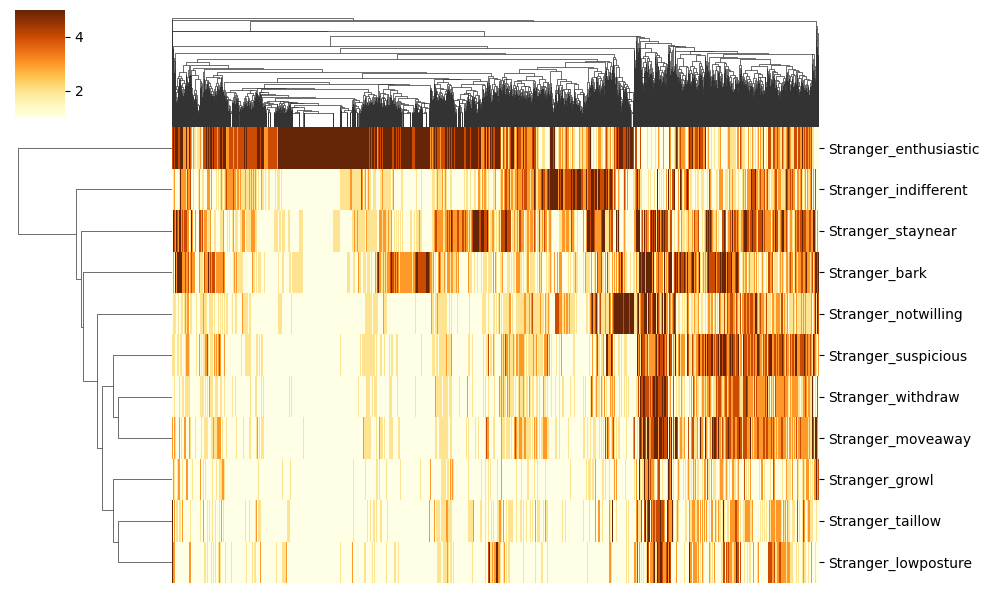

In [15]:
STRANGER_PHOBIAS = ['Stranger_withdraw',
 'Stranger_bark',
 'Stranger_growl',
 'Stranger_taillow',
 'Stranger_staynear',
 'Stranger_notwilling',
 'Stranger_enthusiastic',
 'Stranger_indifferent',
 'Stranger_lowposture',
 'Stranger_moveaway',
 'Stranger_suspicious']

dogs_vs_strangers = dogs[STRANGER_PHOBIAS].dropna().transpose()
sns.clustermap(dogs_vs_strangers, xticklabels=False, cmap='YlOrBr', figsize=(10,6))


1. pes bude pravdepodobne vrcat, ked ma chvost medzi nohami a je skrceny
2. stranger moveaway / withdraw / suspicious su velmi podobne, a asi aj preto to tak ludia v dotaznikoch vyplnili
3. pes steka, ked je notwilling a suspicious